# <center> Data Research of HR-Agency


### HR agency is studying labor market trends in IT. The company wants to conduct a study based on salary data in the field of Data Science for the years 2020-2022 and draw some conclusions.

Explore the data and draw conclusions based on the results. Support your reasoning and conclusions with visualizations and use statistical testing to determine if the findings are statistically significant.

During your analysis, you should:

- Determine which factors influence the salary of a Data Scientist.
- Answer key questions from the HR agency:
    - Is there an annual growth in salaries for Data Scientists?
    - How do the salaries of Data Scientists compare to Data Engineers in 2022?
    - How do the salaries of Data Scientists vary in companies of different sizes?
    - Is there a correlation between the presence of Data Scientist and Data Engineer positions and the size of the company?

If you find interesting patterns in the data, make sure to highlight them in your analysis.

Demonstrate the use of different tests to verify the statistical significance of the conclusions made:

- Tests for quantitative variables:
    - For a single sample.
    - For two samples.
    - For multiple samples.
- Test for categorical variables.

## Import libraries and load data set

In [127]:
#import libraries
import pandas as pd
import numpy as np

#import libraries for statistical tests
from scipy import stats
from statsmodels import stats as sms

#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# visual setup for charts
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [128]:
#loading data set
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [129]:
#drop 'Unnamed':0 column
data = data.drop(['Unnamed: 0'], axis=1)

In [130]:
#setting the significance level 
alpha = 0.05
print(f"The significance level set to: {alpha}")

The significance level set to: 0.05


## Descriptive data analysis

In [131]:
data.info()
print('Data set has 607 entries (no missing entries).')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB
Data set has 607 entries (no missing entries).


In [132]:
#check if the data set has duplicates
num_of_duplicates = data[data.duplicated()].shape[0]
print(f'The number of duplicates in data set is: {num_of_duplicates}')

The number of duplicates in data set is: 42


## Visual Data Analysis

### Salary Distribution among Data Scientist by Year in USD

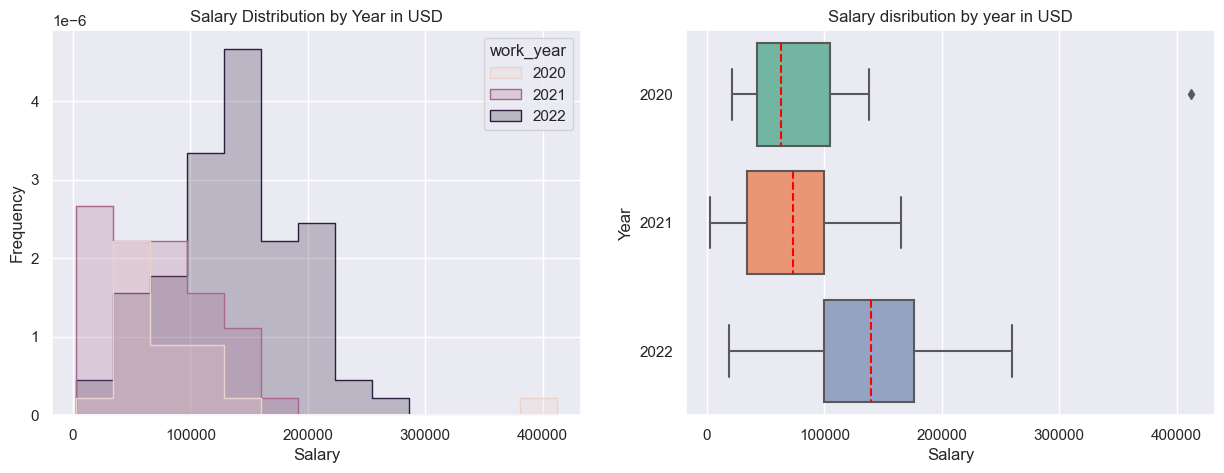

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#hisogram with Salary distribution
sns.histplot(x='salary_in_usd', data=data[(data['job_title']=='Data Scientist')], ax=axes[0], hue='work_year', element='step', stat='density')
axes[0].set(xlabel='Salary', ylabel='Frequency')
axes[0].set_title('Salary Distribution by Year in USD')


#boxplot for each year with salary distribution
sns.boxplot(x='salary_in_usd', y='work_year', orient='h', data=data[(data['job_title']=='Data Scientist')], ax=axes[1], medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Salary', ylabel='Year')
axes[1].set_title('Salary disribution by year in USD')

plt.show()

We can visually observe that each year median salary for the Data Scientist are increasing

In [134]:
#create aggregated table for salary
data_agg = data[(data['job_title']=='Data Scientist')].groupby('work_year')['salary_in_usd'].describe()
data_agg

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.523810,81436.648711,21669.0,42197.0,62726.0,105000.0,412000.0
2021,45.0,70671.733333,45422.967568,2859.0,33808.0,73000.0,100000.0,165000.0
2022,77.0,136172.090909,54563.084740,18442.0,100000.0,140000.0,176000.0,260000.0


The aggregated table confirms our visual observation that the median salary is increasing each year for the Data Scientists.
The mean salary in 2020 is higher then in 2021, thats due the fact that in 2020 max salary value is $412,000 compare to 2021 $165,000, and we have only 21 entries in 2020. Thats why the mean value in 2020 is higher 

### Comparison of salaries among Data Engineers and Data Scientist in 2022

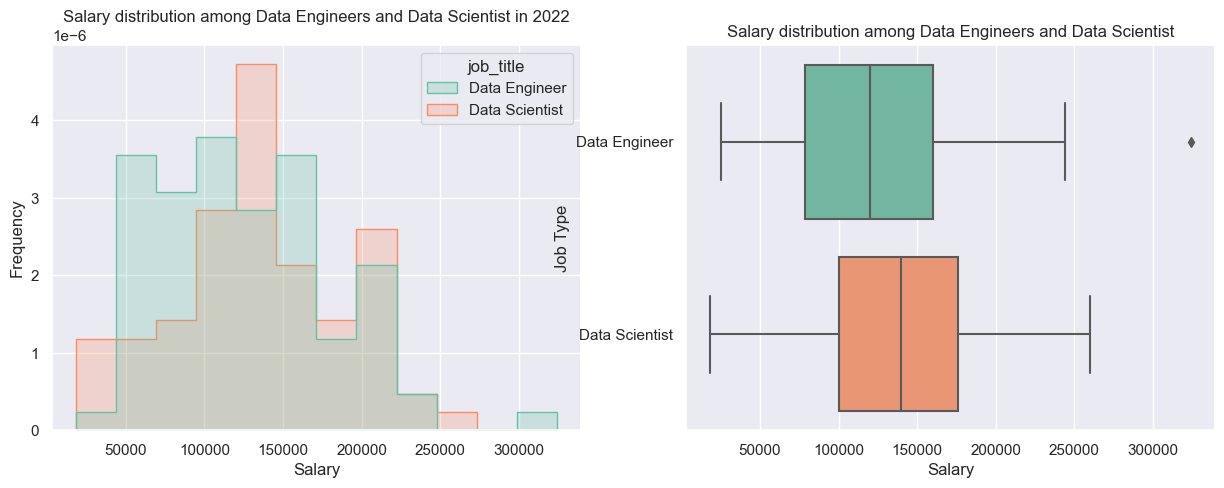

In [135]:
#Create mask to only show data for Data Engineers and Data Scientists in 2022
mask = ((data['job_title']=='Data Engineer') | (data['job_title']=='Data Scientist')) & (data['work_year']==2022)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(x='salary_in_usd', data=data[mask], ax=axes[0], hue='job_title', element='step', stat='density' )
axes[0].set(xlabel='Salary', ylabel='Frequency')
axes[0].set_title('Salary distribution among Data Engineers and Data Scientist in 2022')

sns.boxplot(x='salary_in_usd', y='job_title', data=data[mask], ax=axes[1], orient='h')
axes[1].set(xlabel='Salary', ylabel='Job Type')
axes[1].set_title('Salary distribution among Data Engineers and Data Scientist')
             
plt.show()

Visually we can observe that median salary of Data Scientist in 2022 is higher compare to Data Engineer

In [136]:
data_agg = data[mask].groupby('job_title')['salary_in_usd'].describe()
print('Salary comparison among Data Scientist and Data Engineer in 2022')
data_agg

Salary comparison among Data Scientist and Data Engineer in 2022


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,89.0,126375.696629,55954.398677,25000.0,78526.0,120000.0,160000.0,324000.0
Data Scientist,77.0,136172.090909,54563.084740,18442.0,100000.0,140000.0,176000.0,260000.0


The aggregated data is consistent with our visual observation that salary for Data Scientist is tend to be higher compare to Data Engineer in 2022

### Data Scientist salaries across companies of different sizes

Text(0.5, 1.0, 'Data Scientist salaries across companies of different sizes')

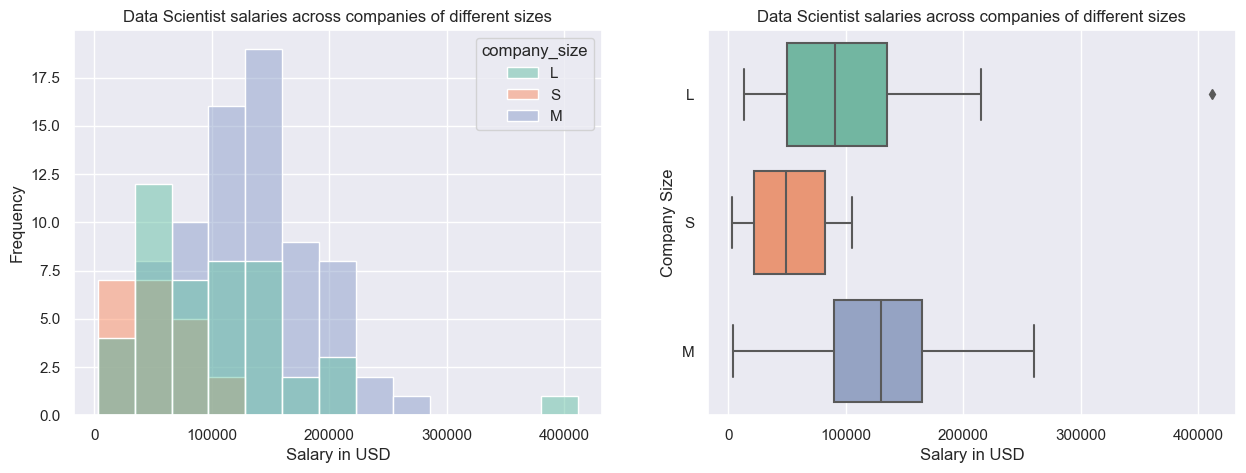

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x='salary_in_usd', data=data[(data['job_title']=='Data Scientist')], ax=axes[0], hue='company_size')
axes[0].set(xlabel='Salary in USD', ylabel='Frequency')
axes[0].set_title('Data Scientist salaries across companies of different sizes')

sns.boxplot(x='salary_in_usd', y='company_size', data=data[(data['job_title']=='Data Scientist')])
axes[1].set(xlabel='Salary in USD', ylabel='Company Size')
axes[1].set_title('Data Scientist salaries across companies of different sizes')

Visual observation shows us that highest median salaries in the companies of Medium Size, following by Large Companies

In [138]:
data_agg = data[(data['job_title']=='Data Scientist')].groupby('company_size')['salary_in_usd'].describe()
data_agg

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,45.0,103313.355556,71815.176484,13400.0,50000.0,90734.0,135000.0,412000.0
M,77.0,126380.753247,56389.528710,4000.0,90000.0,130000.0,165000.0,260000.0
S,21.0,51925.761905,33216.289638,2859.0,21669.0,49268.0,82500.0,105000.0


The aggregated data above alligns with our visual observation and confirms that the highest median salary are observed in the companies of Medium Size

### Relationship among Data Scientist and Data Engineer in companies of different sizes

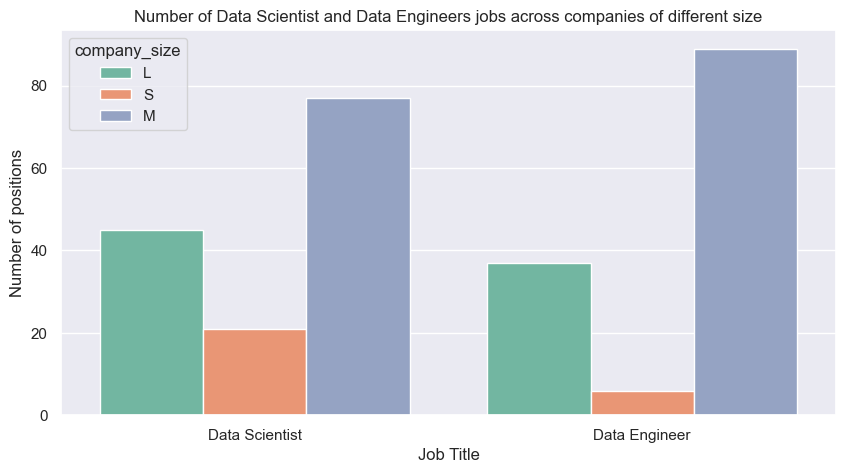

In [139]:
#mask to reflect only information for Data Scientist and Data Engineer
mask = (data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
                         
sns.countplot(data=data[mask], x='job_title', ax=axes, hue='company_size')
axes.set(xlabel='Job Title', ylabel='Number of positions')
axes.set_title('Number of Data Scientist and Data Engineers jobs across companies of different size')
                         
plt.show()

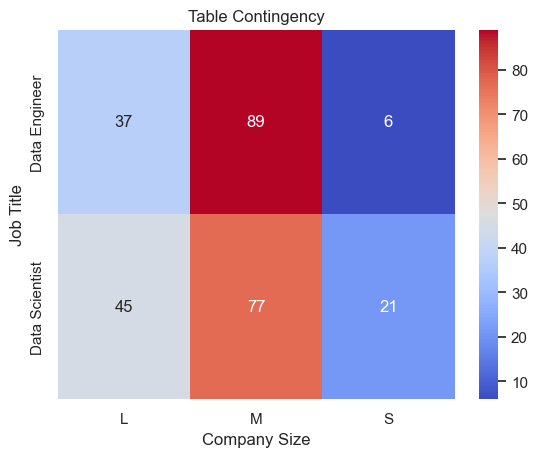

In [140]:
mask = (data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')
cross_tab = pd.crosstab(index=data[mask]['job_title'], columns=data['company_size'])
ax = sns.heatmap(data=cross_tab, annot=True, cmap='coolwarm')
ax.set(xlabel='Company Size', ylabel='Job Title')
ax.set_title('Table Contingency')
plt.show()

From visual observation we can conclude that Data Engineers are in bigger demand in Medium Size companies, while Data Scientist in more demand in Large and Small companies

In [141]:
mask = (data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')
pd.crosstab(data[mask]['job_title'], data[mask]['company_size'])

company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


## Statistical data analysis

In [142]:
# Function to make a decision about normality
def decision_normality(p):
    print(f'p-value = {round(p, 3)}')
    if p <= alpha:
        print(f'The p-value is less than the set significance level {alpha}. The distribution is different from normal.')
    else:
        print(f'The p-value is greater than the set significance level {alpha}. The distribution is normal.')

# Function to make a decision about rejecting the null hypothesis
def decision_hypothesis(p):
    print(f'p-value = {round(p, 3)}')
    if p <= alpha:
        print(f'The p-value is less than the set significance level {alpha}. Reject the null hypothesis in favor of the alternative.')
    else:
        print(f'The p-value is greater than the set significance level {alpha}. We have no reason to reject the null hypothesis.')



### Can we observe yearly salary increase among Data Scientist?

**Lets formulate Null and Alternate hypothesis**

*Null Hypothesis* ($H_0$): The salary among Data Scientist is the same in 2020, 2021 and 2022.

$$ H_0 : μ_1 = μ_2 = u_3 $$

*Alternate Hypothesis* ($H_1$): The salary among Data Scientist different in 2020, 2021 and 2022.

$$ H_1 : μ_1 != μ_2 != u_3 $$

**Lets check the data for normality**

We will perform Shapiro-Wilk test to check the data for normality. Lets remind hypothesis of Shapiro-Wilk test.

**Null Hypothesis** ($H_0$): The distribution of data is normal. We can use parametric statistical tests.

**Alternate Hypothesis** ($H_1$): The distribution of data is different from normal. We have to use non-parametric test.


In [143]:
#Salary of Data Scientist in different years
salary_2020 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2020)]
salary_2021 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2021)]
salary_2022 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2022)]

#Perform Shapiro-Wilk test
print('Salary of Data Scientists in 2020')
result = stats.shapiro(salary_2020['salary_in_usd'])
decision_normality(result[1])

print('Salary of Data Scientists in 2021')
result = stats.shapiro(salary_2021['salary_in_usd'])
decision_normality(result[1])

print('Salary of Data Scientists in 2022')
result = stats.shapiro(salary_2022['salary_in_usd'])
decision_normality(result[1])

Salary of Data Scientists in 2020
p-value = 0.0
The p-value is less than the set significance level 0.05. The distribution is different from normal.
Salary of Data Scientists in 2021
p-value = 0.125
The p-value is greater than the set significance level 0.05. The distribution is normal.
Salary of Data Scientists in 2022
p-value = 0.327
The p-value is greater than the set significance level 0.05. The distribution is normal.


**Lets choose the right statistical test**

To choose the correct statistical test we will use algorithm of test selection. Lets answer to the following questions:

* What is the type of the feature ""Salary in USD""? - Quantitive.
* How many groups are being compared? - Three.
* Are the groups dependent? - No.
* Is the feature normally distributed? - No.

To check our hypothesis we would need to use Kruskal-Wallis statistical test.

**Perform the test**

In [144]:
_, p = stats.kruskal(salary_2020['salary_in_usd'], salary_2021['salary_in_usd'], salary_2022['salary_in_usd'])
decision_hypothesis(p)

p-value = 0.0
The p-value is less than the set significance level 0.05. Reject the null hypothesis in favor of the alternative.


**Conclusion**

There is no basis to claim that salary among data scientist is the same in 2020, 2021 and 2022.

### How the salaries of Data Engineer compares to salaries of Data Scientist in 2022?

In our visual analysis we concluded that the median salary of Data Scientist in 2022 is higher then Data Engineer.

**Lets formulate Null and Alternate hypothesis**

*Null Hypothesis* ($H_0$): The Data Scientist ($u_2$) salary is equal or less then Data Engineer ($u_1$) salary.
$$ H_0 : u_1 >= u_2 $$

*Alternate Hypothesis* ($H_1$): The Data Scientist ($u_2$) salary is greater then Data Engineer ($u_1$) salary.
$$ H_1 : u_1 < u_2 $$


**Lets check data for normality**
We will perform Shapiro-Wilk test

In [145]:
#Salaries of DS and DE in 2022
de_salary = data.loc[(data['job_title']=='Data Engineer') & (data['work_year']==2022), 'salary_in_usd']
ds_salary = data.loc[(data['job_title']=='Data Scientist') & (data['work_year']==2022), 'salary_in_usd']

#perform the shapiro test
print('Data Engineers')
result = stats.shapiro(de_salary)
decision_normality(result[1])

print('Data Scientist')
result = stats.shapiro(ds_salary)
decision_normality(result[1])

Data Engineers
p-value = 0.01
The p-value is less than the set significance level 0.05. The distribution is different from normal.
Data Scientist
p-value = 0.327
The p-value is greater than the set significance level 0.05. The distribution is normal.


**One of the group has different then normal distribution. We would need to use non-parametric tests**

We will use algorithm to determine which statistical test to use. Lets answer the questions:

* What is the type of feature 'Salary in USD'? - Quantitive.
* How many groups are being compared? - Two
* Are the groups dependent? - No
* Is the feature normally distributed? - No

To check our hypothesis we need to use Mann-Whitney U statistical test.

**lets perform the test**

In [146]:
_, p = stats.mannwhitneyu(de_salary, ds_salary, alternative='less')
decision_hypothesis(p)

p-value = 0.077
The p-value is greater than the set significance level 0.05. We have no reason to reject the null hypothesis.


**Conclusion**

We dont have basis to claim that Data Scientists salaries were higher then Data Engineers in 2022.

### How do the salaries of Data Scientists compare in companies of different sizes?

In our visual observation we concluded that Data Scientist salaries tends to be higher in Medium Size companies, following Large companies.

**Lets formulate Null and Alternative hypothesis**

*Null hypothesis* ($H_0$) : The Data Scientist salaries is the same in Small, Medium and Large companies.
$$ H_0 : u_1 = u_2 = u_3 $$

*Alternative hypothesis* ($H_1$) : The Data Scientist salaries are not the same in Small, Medium and Large companies.
$$ H_1 : u_1  != u_2  != u_3 $$

**Lets check data for normality**

We will perform Shapiro-Wilk test

In [147]:
ds_small = data.loc[(data['company_size']=='S') & (data['job_title']=='Data Scientist'), 'salary_in_usd']
ds_medium = data.loc[(data['company_size']=='M') & (data['job_title']=='Data Scientist'), 'salary_in_usd']
ds_large = data.loc[(data['company_size']=='L') & (data['job_title']=='Data Scientist'), 'salary_in_usd']

print('For Small companies')
result = stats.shapiro(ds_small)
decision_normality(result[1])

print('For Medium companies')
result = stats.shapiro(ds_medium)
decision_normality(result[1])

print('For Large companies')
result = stats.shapiro(ds_large)
decision_normality(result[1])

For Small companies
p-value = 0.189
The p-value is greater than the set significance level 0.05. The distribution is normal.
For Medium companies
p-value = 0.639
The p-value is greater than the set significance level 0.05. The distribution is normal.
For Large companies
p-value = 0.0
The p-value is less than the set significance level 0.05. The distribution is different from normal.


**One of the group doesnt have normal distribution. We will use non-parametric statistical test**

We will use algorithm to determine which statistical test to use. Lets answer the questions:

* What is the type of feature 'Salary in USD'? - Quantitive.
* How many groups are being compared? - Three
* Are the groups dependent? - No
* Is the feature normally distributed? - No

To check our hypothesis we would need to use Kruskal-Wallis statistical test

**lets perform the test**

In [148]:
_, p = stats.kruskal(ds_small, ds_medium, ds_large)
decision_hypothesis(p)

p-value = 0.0
The p-value is less than the set significance level 0.05. Reject the null hypothesis in favor of the alternative.


**Conclusion**

There is no basis to claim that the salary is the same among Data Scientist in the companies of differ sizes

### Is there a relationship between the presence of Data Scientist and Data Engineer positions and the size of the company?

From our visual observation we concluded that Data Engineers has more available positions compare to Data Scientist in Medium size companies, while Data Scientist has more available positions in Small and Large companies.

*We want to test if there is a relationship between 'Job Title' and 'Company Size'*

**Lets come up with Null and Alternative hypothesis**

*Null hypothesis* ($H_0$) : There is no relationship between 'Job Title' and 'Company Size'. The feature 'Job Title' and 'Company Size' are independent

*Alternate hypothesis* ($H_1$) : There is a relationship between 'Job Title' and 'Company Size'. The feature 'Job Title' and 'Company Size' are dependent

**Lets select the correct statistical test**

We will use algorithm to determine which statistical test to use. Lets answer the questions.
* What type is the feature 'Job Title'? — Categorical.
* How many groups we compare? — Two.
* Do we check the groups for indepence? — Yes.

To check our hypothesis we should use ${\chi}^2$ (Chi-square).

**Perform the test**

In [149]:
# create table for contigency
mask = (data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')
cross_table = pd.crosstab(data[mask]['job_title'], data[mask]['company_size'])

#performing the test
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.008
The p-value is less than the set significance level 0.05. Reject the null hypothesis in favor of the alternative.


**Conclusion**

There is a statistically significant relationship between Job Title (Data Scientist and Data Engineer) and Company Size

### Final results of the research

* There is no basis to claim that salary among data scientist is the same in 2020, 2021 and 2022.

* We dont have basis to claim that Data Scientists salaries were higher then Data Engineers in 2022.

* There is no basis to claim that the salary is the same among Data Scientist in the companies of differ sizes

* There is a statistically significant relationship between Job Title (Data Scientist and Data Engineer) and Company Size